In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import svm
from sklearn.metrics import *

In [92]:
data = pd.read_csv(r"big_mart_data.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [93]:
data.shape

(8523, 12)

In [94]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [95]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [96]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [98]:
# data.corr()['Item_Outlet_Sales'].sort_values(ascending=False)

## Categorical fetures
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

## Handling missing Values
- Mean => avg of data points
- Mode => repeated values

In [99]:
data['Item_Weight'].mean()

12.857645184135976

In [100]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13424\604173841.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace = True)


In [101]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [102]:
mode_of_outletSize = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))

In [103]:
print(mode_of_outletSize)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [104]:
missing_values = data['Outlet_Size'].isnull()
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [105]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outletSize[x])

In [106]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data Analysis
- plotting of numerical and categorical cols

In [107]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [108]:
sns.set()

C:\Users\HP\AppData\Local\Temp\ipykernel_13424\3728466586.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Item_Weight)


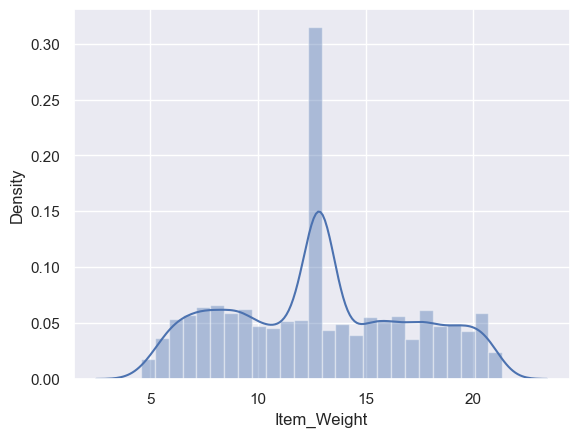

In [109]:
sns.distplot(data.Item_Weight)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13424\1149529698.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Item_Visibility)


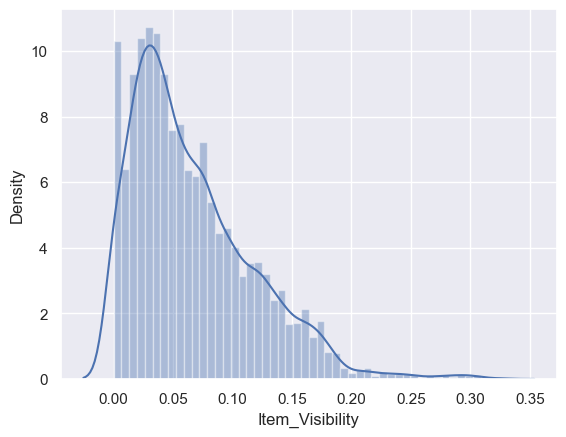

In [110]:
sns.distplot(data.Item_Visibility)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13424\748600119.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Item_MRP)


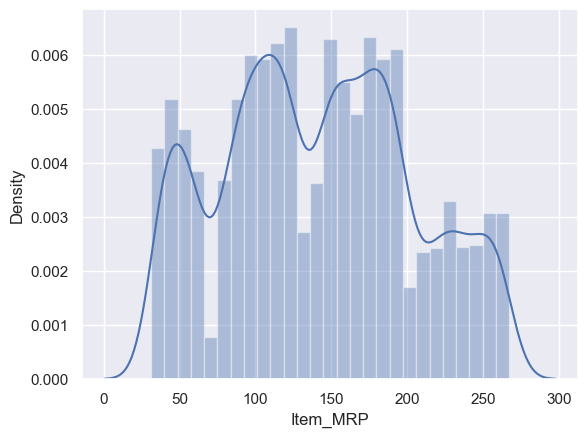

In [111]:
sns.distplot(data.Item_MRP)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13424\4159101860.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Item_Outlet_Sales)


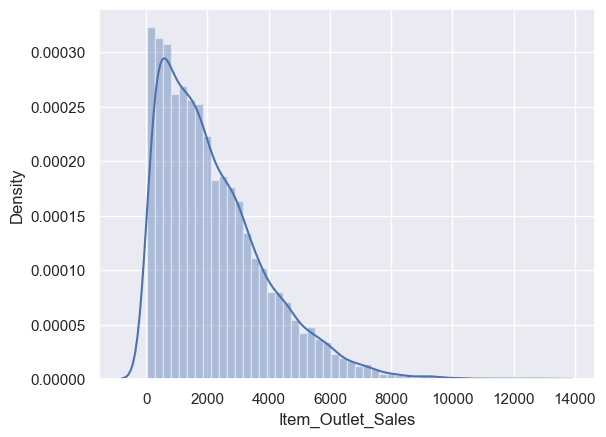

In [112]:
sns.distplot(data.Item_Outlet_Sales)
plt.show()

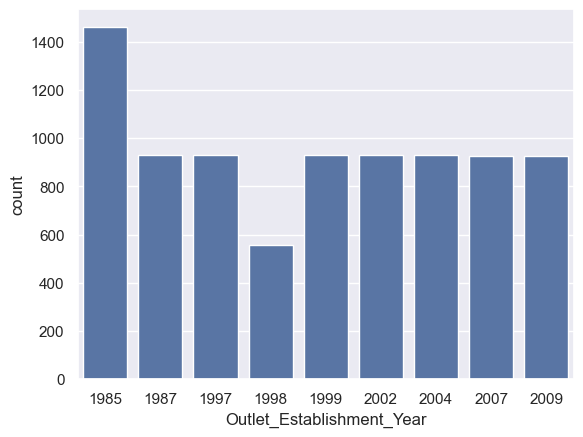

In [113]:
sns.countplot(x = 'Outlet_Establishment_Year',data = data)
plt.show()

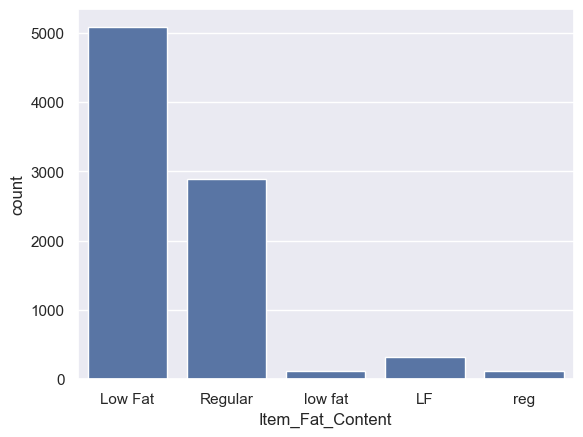

In [114]:
sns.countplot(x = 'Item_Fat_Content',data = data)
plt.show()

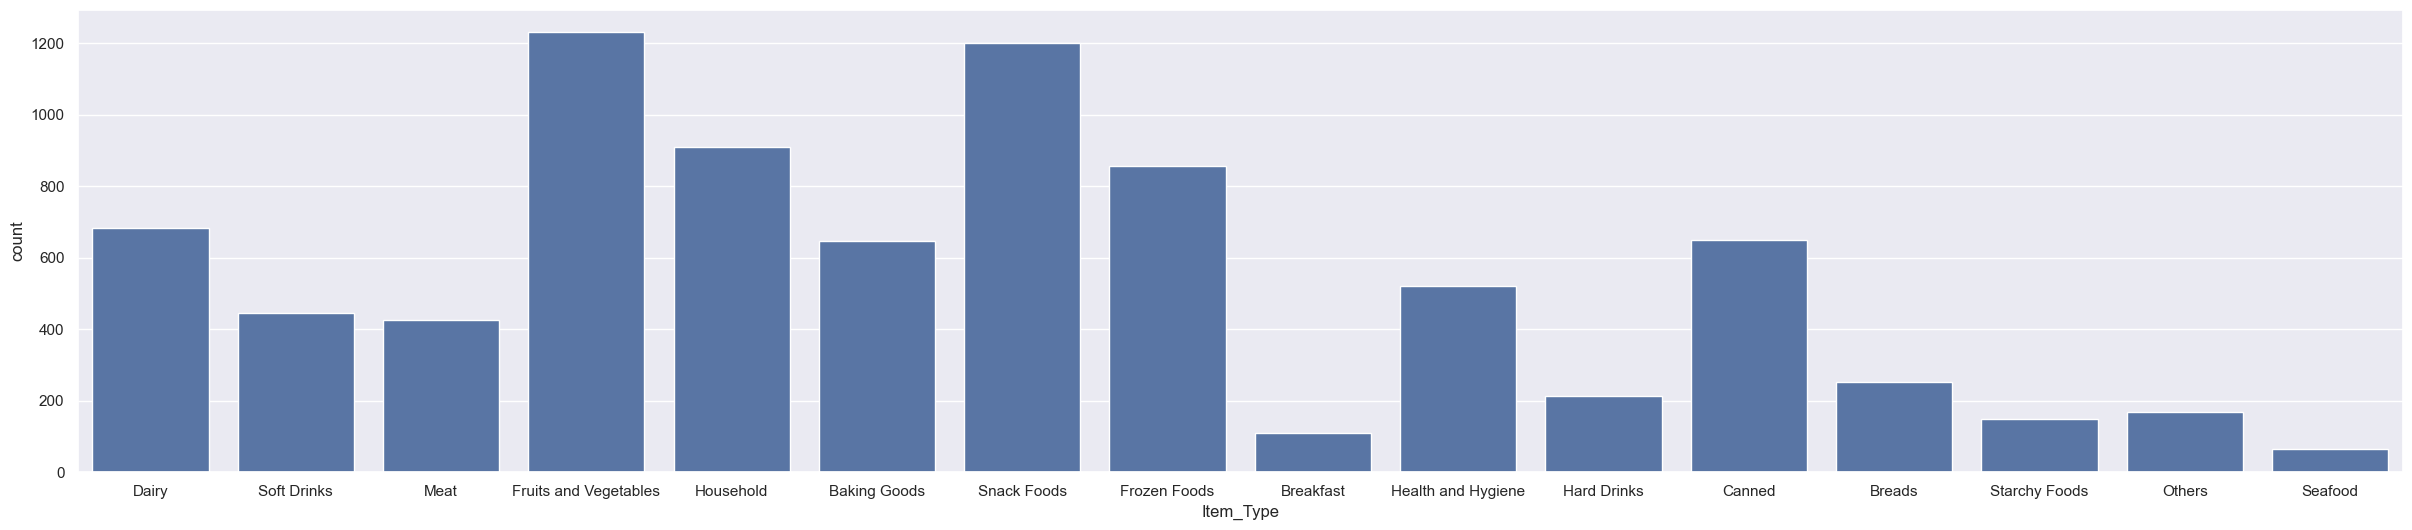

In [115]:
plt.figure(figsize=(30,6))
sns.countplot(x = 'Item_Type',data = data)
plt.show()

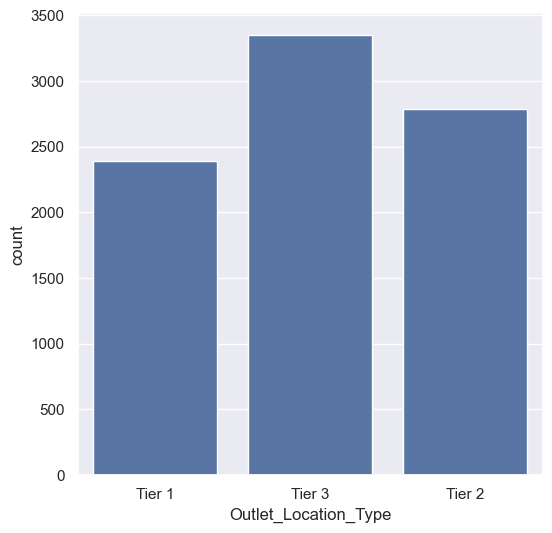

In [116]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'Outlet_Location_Type',data = data)
plt.show()

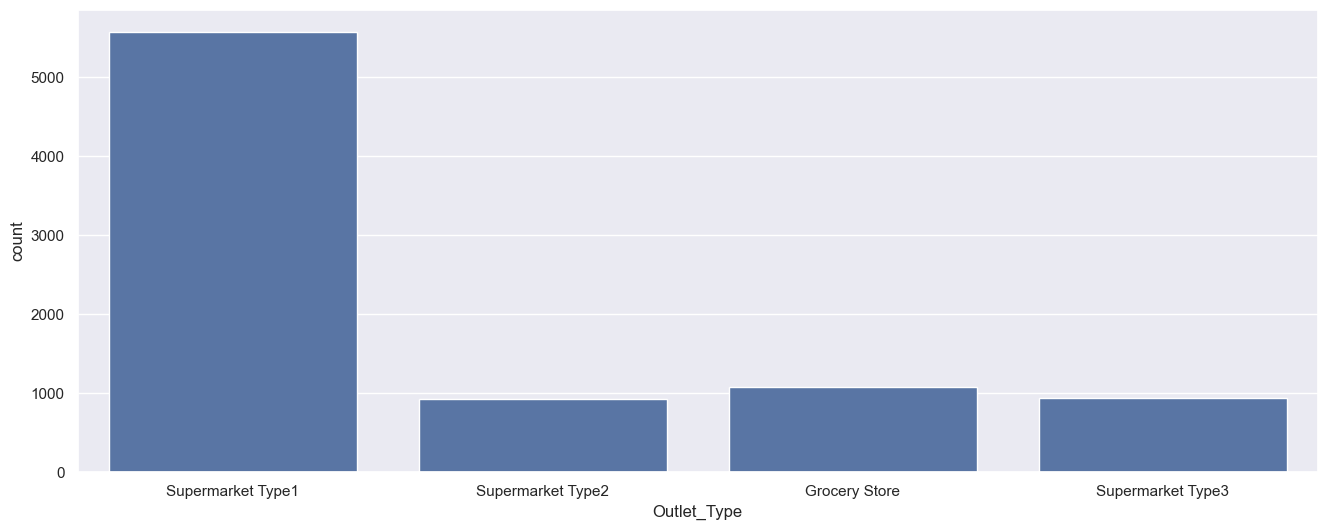

In [117]:
plt.figure(figsize=(16,6))
sns.countplot(x = 'Outlet_Type',data = data)
plt.show()


## Data PreProcessing

In [118]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [119]:
data.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [120]:
data.replace({'Item_Fat_Content':{'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}},inplace=True)

In [121]:
data.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

## Label Encoding 
- categorical fetures to numeric values

In [122]:
encoder = LabelEncoder()

- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [123]:
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])

data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])

data['Item_Type'] = encoder.fit_transform(data['Item_Type'])

data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])

data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])

data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])

data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])

In [124]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [125]:
data.corr()['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Type                  0.401522
Outlet_Identifier            0.162325
Outlet_Location_Type         0.089367
Item_Fat_Content             0.018719
Item_Type                    0.017048
Item_Weight                  0.011550
Item_Identifier              0.002869
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Outlet_Size                 -0.162753
Name: Item_Outlet_Sales, dtype: float64

In [126]:
X = data.drop('Item_Outlet_Sales',axis=1)
Y = data.Item_Outlet_Sales

In [127]:
X.shape

(8523, 11)

In [128]:
Y.shape

(8523,)

# Splitting data into Train test

In [129]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [130]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [131]:
# Machine learning model training

In [133]:
model = XGBRegressor()

In [134]:
model.fit(X_train,Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


# Evaluation

In [140]:
# training data prediction
training_data_pred = model.predict(X_train)

In [141]:
# r2-square(0/1)

r2_sqr = r2_score(Y_train,training_data_pred)
print(r2_sqr)

0.8762174618111388


In [142]:
# test data prediction
test_data_pred = model.predict(X_test)

In [143]:
# r2-square(0/1)

r2_test = r2_score(Y_test,test_data_pred)
print(r2_test)

0.5017253991620692


In [144]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [145]:
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=0.001),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(n_estimators=200, random_state=42),
    GradientBoostingRegressor(random_state=42),
    XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
]


In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import numpy as np

def compare_regression_models(X, y, models):
    for model in models:
        # 5-fold cross validation R2
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
        
        print("="*60)
        print(f"Model: {model.__class__.__name__}")
        print(f"Cross-Val R2 Scores: {np.round(cv_scores, 3)}")
        print(f"Mean R2 Score: {cv_scores.mean():.4f}")
        print()


In [147]:
compare_regression_models(X_train, Y_train, models)

Model: LinearRegression
Cross-Val R2 Scores: [0.534 0.496 0.485 0.519 0.489]
Mean R2 Score: 0.5047

Model: Ridge
Cross-Val R2 Scores: [0.534 0.495 0.485 0.519 0.489]
Mean R2 Score: 0.5047

Model: Lasso
Cross-Val R2 Scores: [0.534 0.496 0.485 0.519 0.489]
Mean R2 Score: 0.5047

Model: DecisionTreeRegressor
Cross-Val R2 Scores: [0.208 0.123 0.157 0.119 0.155]
Mean R2 Score: 0.1523

Model: RandomForestRegressor
Cross-Val R2 Scores: [0.593 0.554 0.553 0.575 0.529]
Mean R2 Score: 0.5608

Model: GradientBoostingRegressor
Cross-Val R2 Scores: [0.619 0.589 0.577 0.61  0.573]
Mean R2 Score: 0.5937

Model: XGBRegressor
Cross-Val R2 Scores: [0.604 0.567 0.56  0.581 0.556]
Mean R2 Score: 0.5736

